In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [3]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [4]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

face :
t-statistic: 9.982847239347283 p-value: 4.298831956168037e-06
animal :
t-statistic: 6.778870197254284 p-value: 7.041448339741816e-05
vehicle :
t-statistic: 5.682166759854165 p-value: 0.00023191459973088356
sport :
t-statistic: 3.1987295390672896 p-value: 0.006318226836448628
food :
t-statistic: 8.978230699702186 p-value: 9.432002236499687e-06
person :
t-statistic: 4.361079043394116 p-value: 0.0012045766198056735
tool :
t-statistic: 3.0631125757716977 p-value: 0.007754574978007086
outdoor :
t-statistic: 2.695481967142273 p-value: 0.013632067893418528
furniture :
t-statistic: 0.3331198505318241 p-value: 0.37380308042677346
Bonferroni:

Reject: [ True  True  True False  True  True False False False]
pvals corrected: [3.86894876e-05 6.33730351e-04 2.08723140e-03 5.68640415e-02
 8.48880201e-05 1.08411896e-02 6.97911748e-02 1.22688611e-01
 1.00000000e+00]
Benjamini/Hochberg:

Reject: [ True  True  True  True  True  True  True  True False]
pvals corrected: [3.86894876e-05 2.11243450e-0

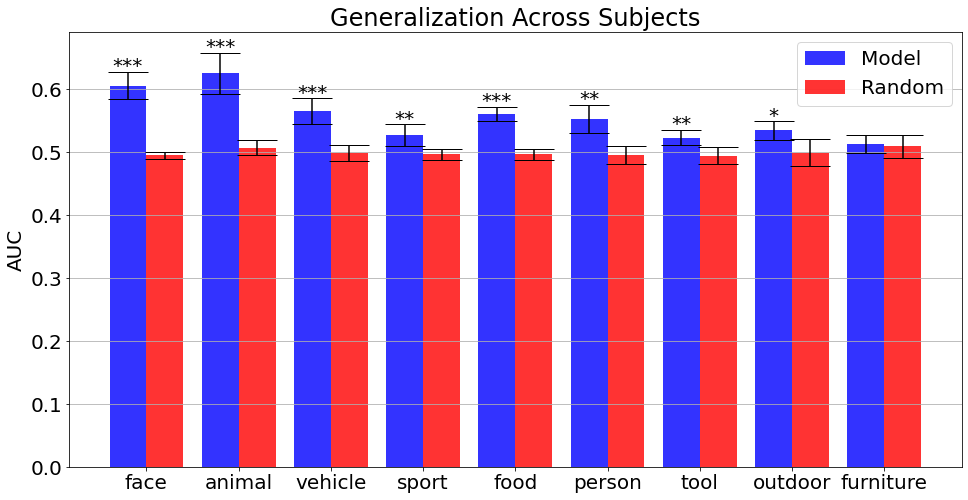

In [6]:
names = ['person', 'face', 'vehicle', 'outdoor', 'animal', 'sport', 'food', 'furniture', 'tool']
sub =[[0.5909538,0.63558465,0.60098964,0.62469155,0.5769455],
[0.58423966,0.6039801,0.6104143,0.6660936,0.66239345],
[0.58861285,0.5506586,0.5888153,0.5400807,0.5593906],
[0.5223663,0.5569924,0.50602984,0.51927155,0.53207356],
[0.5471279,0.5605136,0.57383776,0.5721047,0.54882663],
[0.57217324,0.5608868,0.50937843,0.55744964,0.56657714],
[0.5203591,0.52994186,0.52428323,0.5399356,0.50182915],
[0.54462886,0.54766303,0.54682535,0.5179059,0.51605594],
[0.50488436,0.52407676,0.51753443,0.52976936,0.48964033]]

sub_rand=[[0.5001862,0.49218592,0.48672527,0.4937167,0.50168437],
[0.50951135,0.49183893,0.49546275,0.5187821,0.5202668],
[0.5154317,0.48475716,0.5102727,0.4849781,0.4971365],
[0.4942947,0.48665923,0.4894766,0.5130207,0.49848723],
[0.48435283,0.489598,0.5038782,0.49666965,0.5082086],
[0.47070011,0.500983,0.49799395,0.49522692,0.51314396],
[0.46935323,0.50285053,0.50001246,0.4907943,0.5095254],
[0.50325286,0.5111793,0.45618597,0.51605594,0.509538],
[0.49943024,0.49879953,0.48739365,0.53508395,0.52596754]]
categories, categories_rand = sub, sub_rand
#categories, categories_rand = np.transpose(categories), np.transpose(categories_rand)
CTEs, CTEs_rand, error, error_rand, x_pos = process(categories, categories_rand, names)
pvals_corrected = ttest(names, categories, categories_rand)
t_stat = stats.ttest_ind(sub[0], sub_rand[0]).statistic
pval = stats.ttest_ind(sub[0], sub_rand[0]).pvalue / 2
print("p-value:", pval)
build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected,
           'Generalization Across Subjects', 'upper right')
